In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # for standardized the function 
from sklearn.model_selection import train_test_split # train_test_spilt is used to spilt the data into train data to test data
from sklearn import svm
from sklearn.metrics import accuracy_score
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
import matplotlib.pyplot as plt

In [9]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('F:\\Projects\\Diabetes disease prediction\\diabetes.csv') 
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes_dataset['Outcome'].value_counts() # it counts the outcomes in  the data  

0    500
1    268
Name: Outcome, dtype: int64

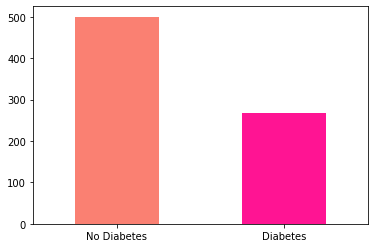

In [13]:
diabetes_dataset["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [14]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


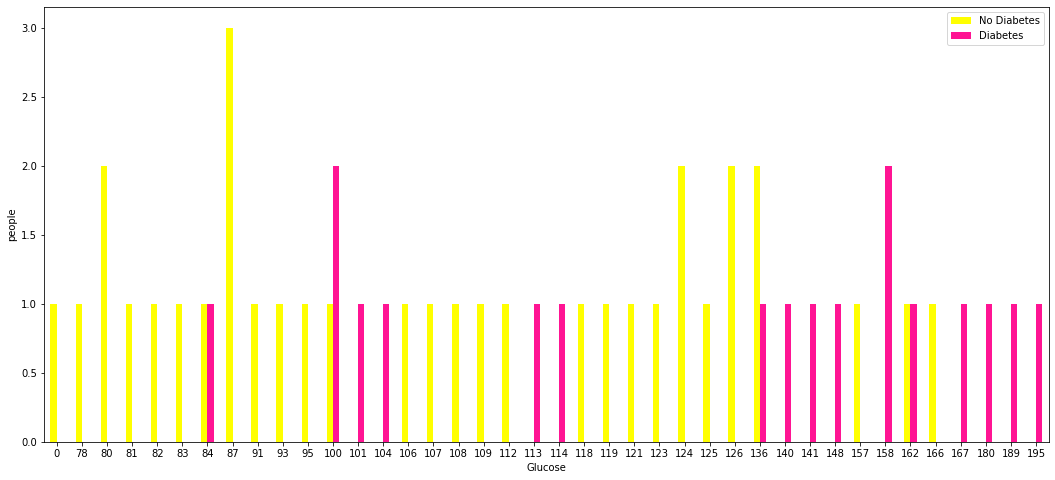

In [18]:
# Comparing Glucose with the Outcome
pd.crosstab(diabetes_dataset.Glucose[::15],diabetes_dataset.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

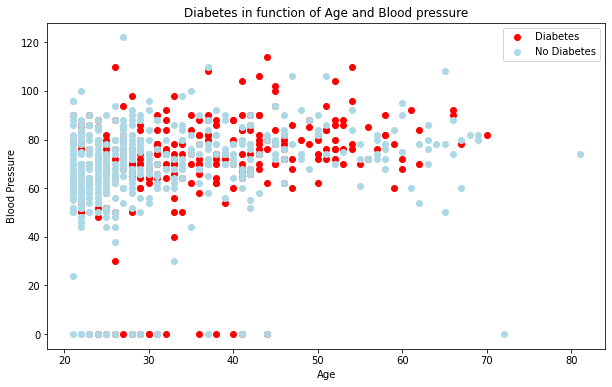

In [19]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(diabetes_dataset.Age[diabetes_dataset.Outcome==1],diabetes_dataset.BloodPressure[diabetes_dataset.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(diabetes_dataset.Age[diabetes_dataset.Outcome==0],diabetes_dataset.BloodPressure[diabetes_dataset.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

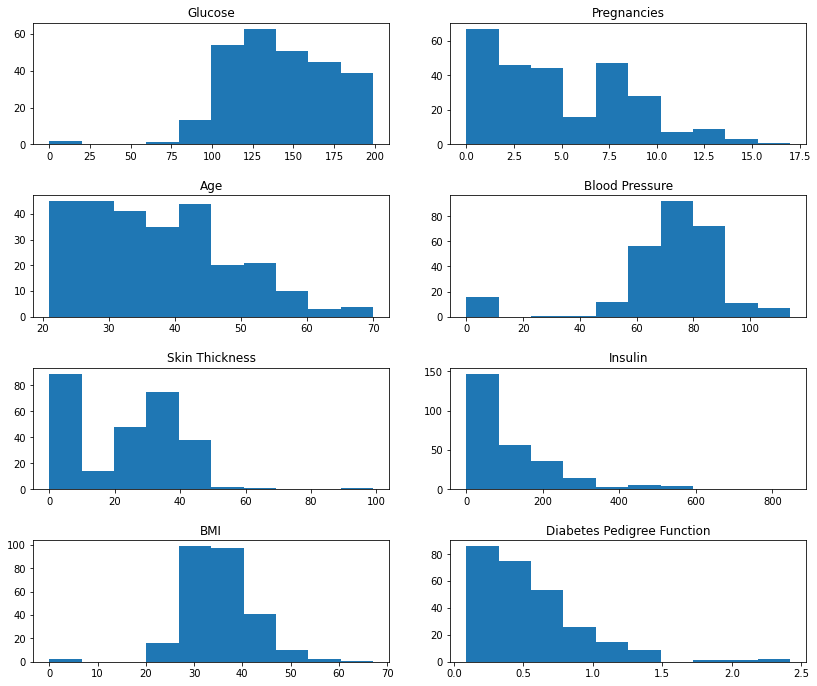

In [20]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(diabetes_dataset.Glucose[diabetes_dataset.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(diabetes_dataset.Pregnancies[diabetes_dataset.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(diabetes_dataset.Age[diabetes_dataset.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(diabetes_dataset.BloodPressure[diabetes_dataset.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(diabetes_dataset.SkinThickness[diabetes_dataset.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(diabetes_dataset.Insulin[diabetes_dataset.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(diabetes_dataset.BMI[diabetes_dataset.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(diabetes_dataset.DiabetesPedigreeFunction[diabetes_dataset.Outcome==1]);

In [21]:
scaler = StandardScaler() 

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)

In [24]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [26]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [29]:
classifier = svm.SVC(kernel='poly')

In [30]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [31]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8029315960912052


In [33]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7077922077922078


In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[0]
The person is not diabetic


In [37]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,Y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,Y_test)

In [38]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train);
## Evaluating the model
knn = knn.score(X_test,Y_test)

In [39]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,Y_train);
## Evaluating the model
clf = clf.score(X_test,Y_test)

In [40]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,Y_train)
svm = svm.score(X_test,Y_test)

In [41]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [42]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.75974,0.720779,0.727273,0.727273


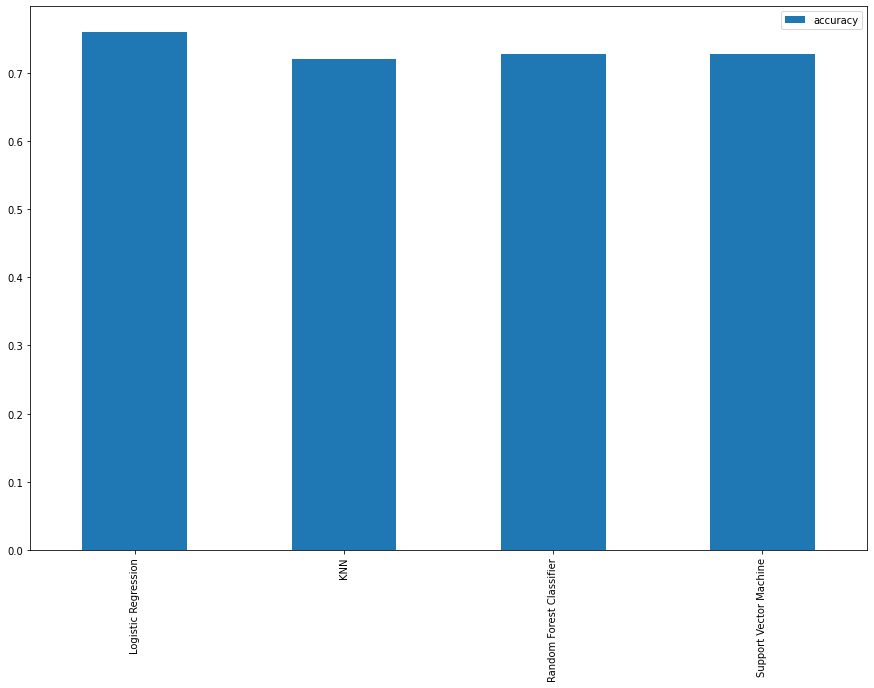

In [43]:
model_compare.T.plot.bar(figsize=(15,10));

In [44]:
X_train.shape[1]

8

# create model

In [45]:
#Module importingg
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
import seaborn as sns
import matplotlib.pyplot as plt



In [46]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))  # input layer requires input_dim param
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

In [47]:
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs=1000, batch_size=10,validation_data=(X_test, Y_test))


Epoch 1/1000
62/62 [==============================] - 2s 8ms/step - loss: 0.6897 - accuracy: 0.6270 - val_loss: 0.6809 - val_accuracy: 0.6623
Epoch 2/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6694 - val_loss: 0.5802 - val_accuracy: 0.6818
Epoch 3/1000
62/62 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.7085 - val_loss: 0.5203 - val_accuracy: 0.7338
Epoch 4/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7492 - val_loss: 0.5045 - val_accuracy: 0.7792
Epoch 5/1000
62/62 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7801 - val_loss: 0.4949 - val_accuracy: 0.7597
Epoch 6/1000
62/62 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7736 - val_loss: 0.4935 - val_accuracy: 0.7662
Epoch 7/1000
62/62 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.7785 - val_loss: 0.4971 - val_accuracy: 0.7662
Epoch 

In [50]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

24/24 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.9310

accuracy: 93.10%
